<a href="https://colab.research.google.com/github/RaghuMadhavTiwari/PySpark-practice/blob/main/Programming_with_RDDs_in_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming with RDDs in PySpark**

![SPARK](https://spark.apache.org/docs/latest/img/spark-logo-hd.png)


While working with big data which is the neccessity of Data scientists in todays time, executions are carried out on Apache spark. Initially built on Scala, now spark can run on top of Python using PySpark. 

At a high level, every Spark application consists of a driver program that runs the user’s main function and executes various parallel operations on a cluster. The main abstraction Spark provides is a resilient distributed dataset (RDD), which is a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel.

This blog focusses on providing a gentle introduct to RDD in Spark using PySpark.


An RDD (Resilient Distributed Dataset) in Spark is simply an **immutable distributed collection of objects**. Each RDD is split into multiple partitions,
which may be computed on different nodes of the cluster.
RDD's are the Fundamental datatypes in PySpark.

#### Prerequistiques:
1. Big data fudamentals
2. Pyspark working and fundamentals
3. Python knowledge


#### Configure the platform
We will use Google colaboratory for running PySpark commands, so first let's configure Colab.

In [ ]:
# Installing PySpark on colab
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 39 kB/s 
     |████████████████████████████████| 199 kB 54.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=7d8f01fe27fa55e47eac711121272cacda7fcf25b2ddde5497c5263fe2ce5cf6
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark create RDD example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()

In [ ]:
sc = spark.sparkContext

Great! 

We have our PySpark installed and initiated a spark session configured with just one command in colab. Now let's create RDDs.

## Creating RDD in Spark

There are 2 ways in which dataframes are created:
1. By loading an external dataset
2. Distributing a set of collection of objects



Let's first use the ```parallelize()``` method to create RDD from an already existing collection of objects in our program.

In [ ]:
# Lets create a FIFA table using RDD structure
fifa_table1 = sc.parallelize([("ARG",3,2,1,0),
                    ("MEX",3,1,2,0),
                    ("KSA",3,1,1,1),
                    ("TUN",3,0,0,3)]).toDF(['Team', 'Played', 'Won','Draw','Lost'])
fifa_table1.show()

+----+------+---+----+----+
|Team|Played|Won|Draw|Lost|
+----+------+---+----+----+
| ARG|     3|  2|   1|   0|
| MEX|     3|  1|   2|   0|
| KSA|     3|  1|   1|   1|
| TUN|     3|  0|   0|   3|
+----+------+---+----+----+



```show()``` — prints first 20 rows in dataframe

In [ ]:
# Create a Python list of numbers from 1 to 10 
numb = range(1, 11)

# Load the list into PySpark  
rdd1 = sc.parallelize(numb)

# use collect to have a look at the list
rdd1.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

```collect()``` — returns all elements of RDD as an array

In [ ]:
# another example
rdd2 = sc.parallelize([(1,2), (3,4), (5,6), (7,8), (9,10)])

rdd2.collect()

[(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

We can also create RDDs from a CSV file using ```read.csv()``` which first creates a dataframe which we then convert to an RDD using ```.rdd```

In [ ]:
dataRDD = spark.read.csv('/content/sample_data/california_housing_train.csv').rdd
dataRDD.first()

Row(_c0='longitude', _c1='latitude', _c2='housing_median_age', _c3='total_rooms', _c4='total_bedrooms', _c5='population', _c6='households', _c7='median_income', _c8='median_house_value')

the ```first()``` command retrieves the first record from an RDD

Create RDD from a textfile using ```textFile()``` 

In [ ]:
distFile = sc.textFile("data.txt")

Create an RDD from a json file using ```read.json()``` which creates a dataframe and we convert it to RDD using ```.rdd```

In [ ]:
dataRDD = spark.read.json("/content/sample_data/anscombe.json").rdd
dataRDD.take(2)

[Row(Series=None, X=None, Y=None, _corrupt_record='['),
 Row(Series='I', X=10.0, Y=8.04, _corrupt_record=None)]

```take(n)```	Returns an array with the first n elements of the dataset

Note: RDDs can also be created from-
1. an by reading a dataset from a Database

SYNTAX - 
```
df = spark.read.jdbc(url=url, table=table_name,properties=properties)
```
2. by an HDFS

SYNTAX - 
```
from pyspark.sql import HiveContext
hc = HiveContext(sc)
tf1 = sc.textFile("hdfs://.../demo.CSV")
hc.sql("use intg_cme_w")
spf = hc.sql("SELECT * FROM spf LIMIT 100")
```

## Spark Operations

There are 2 main types of Spark operations:
1. Transformation - to construct a new RDD from a previous one
2. Actions - perform computation on the RDD and return a value

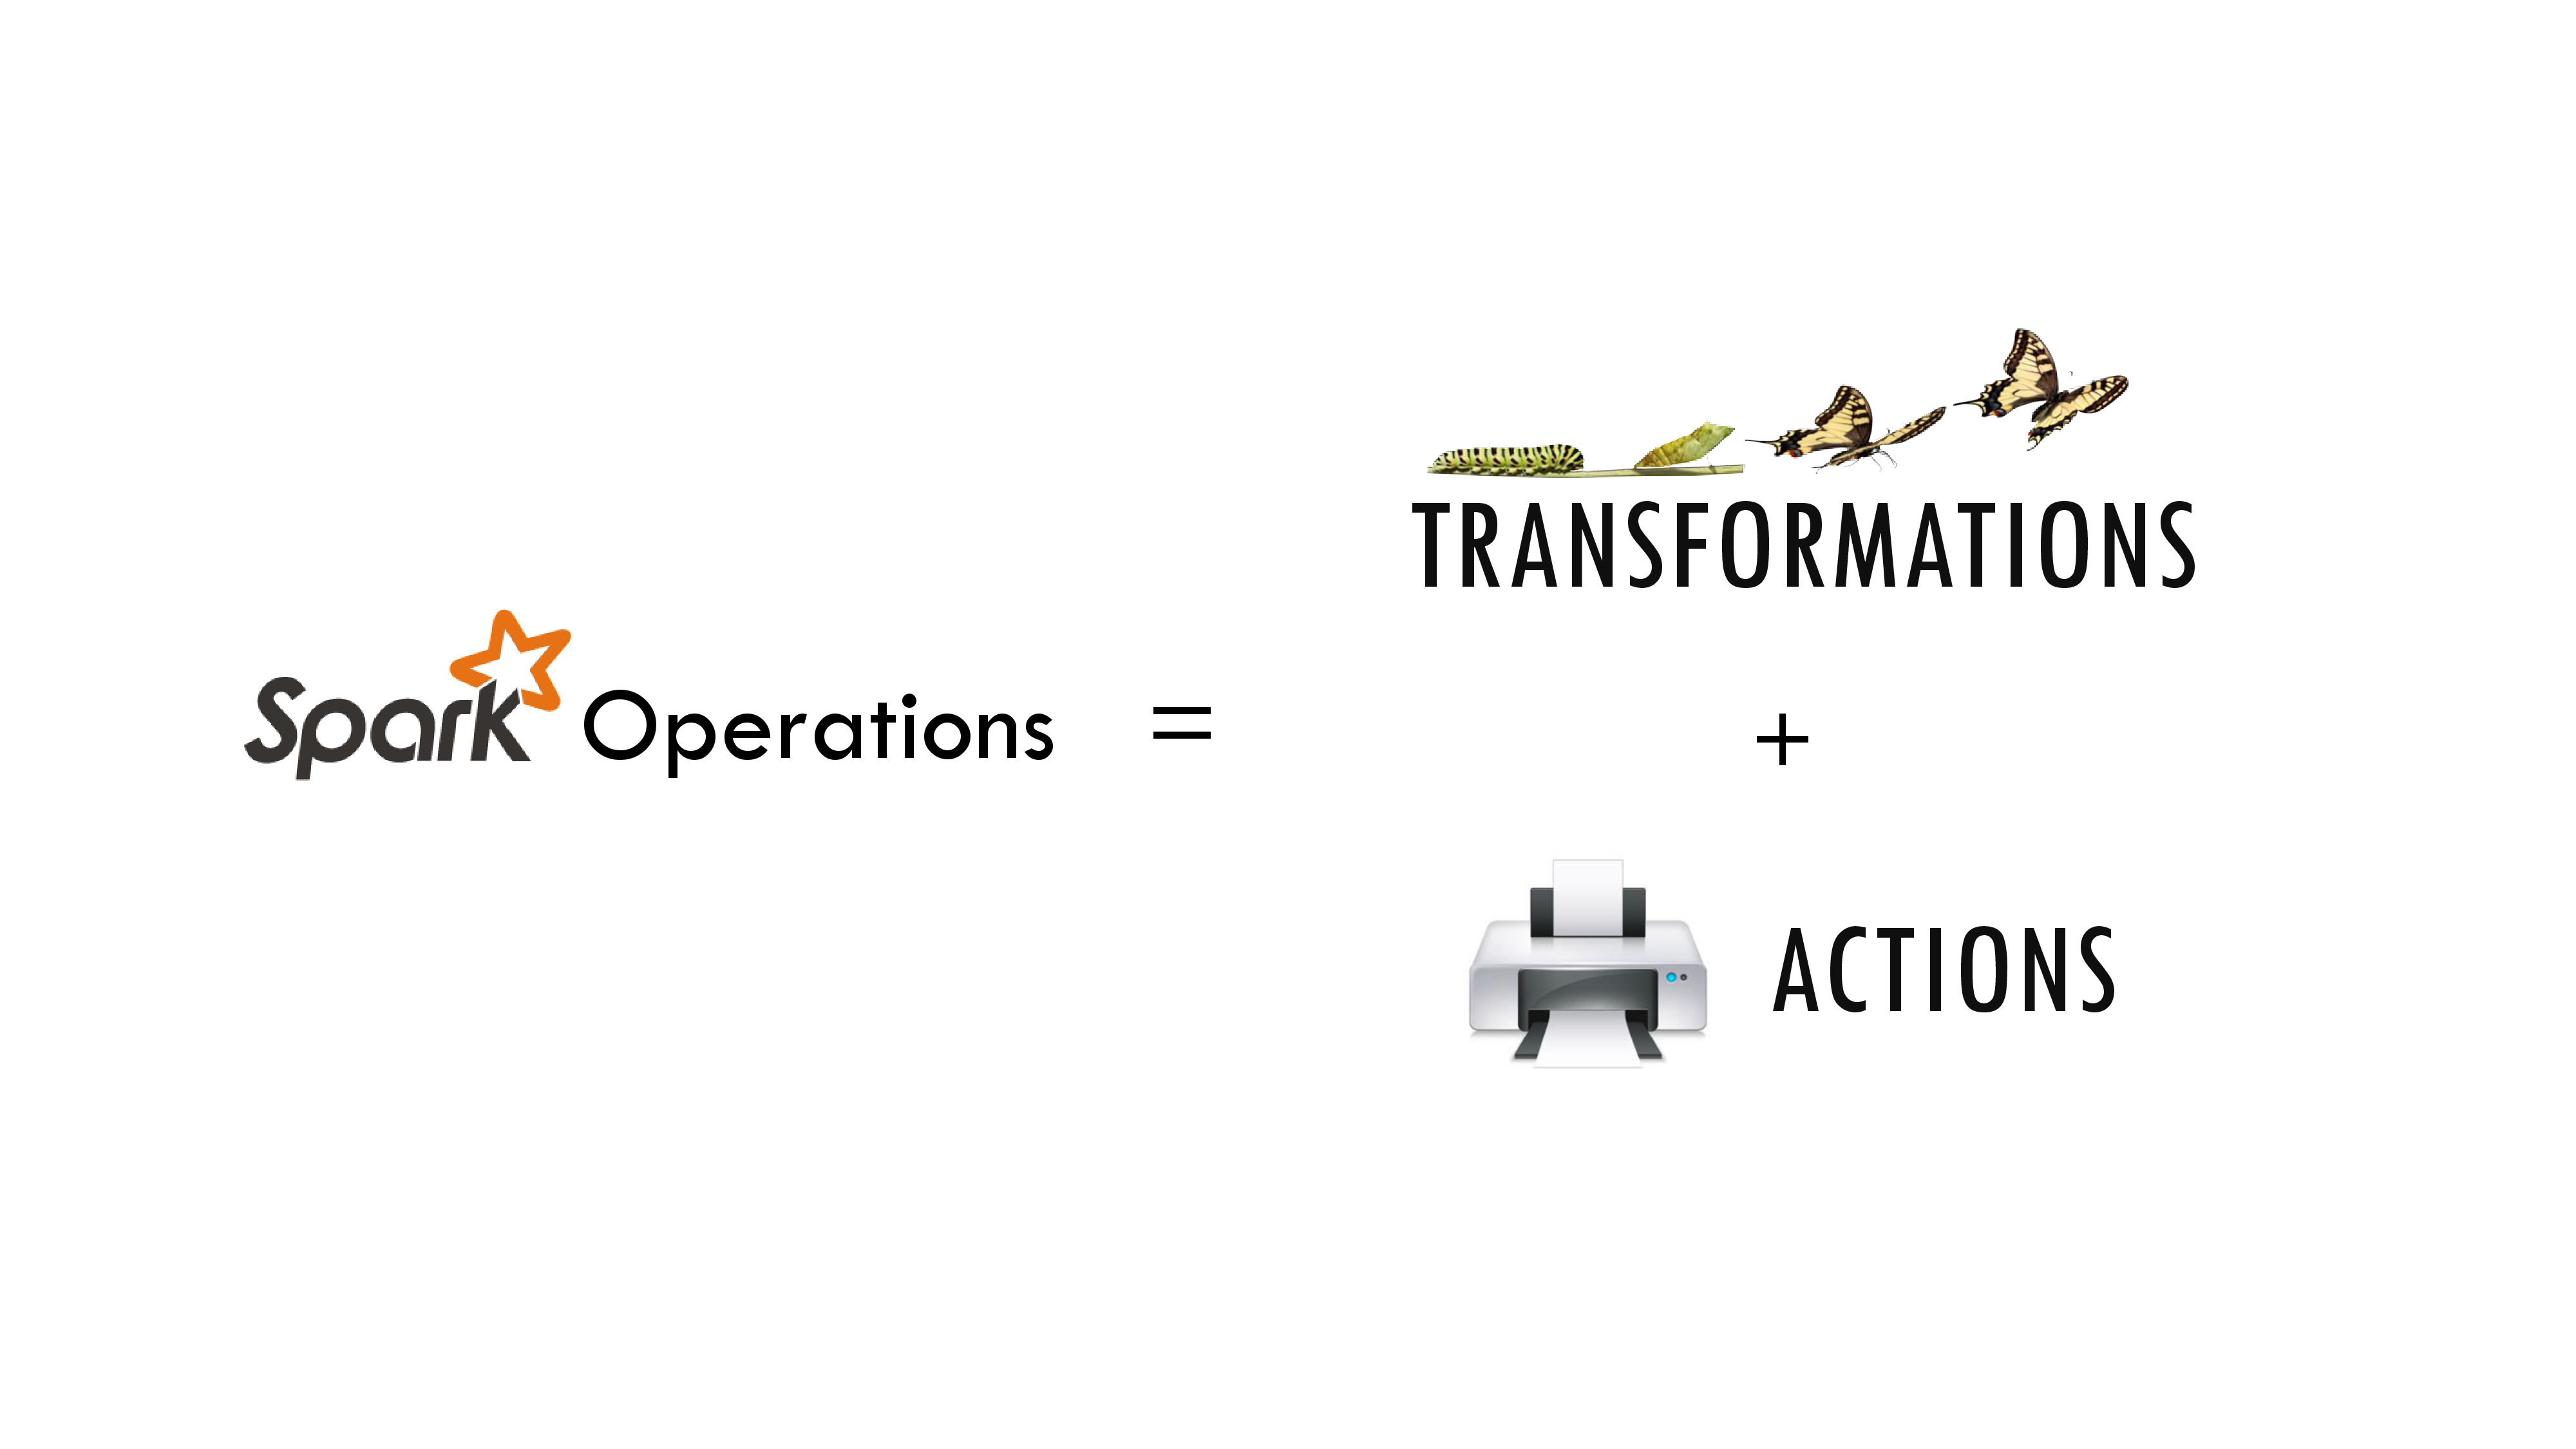
#### Transformations

PySpark RDD Transformations are lazy evaluation, which means  Spark creates a graph from all the operations you perform on an RDD and execution of a graph starts only when an action is performed on RDD, in simple words an operation does not execute only untl it is called by an action.
It is used to transform/update from one RDD into another. When executed on RDD, it results in a single or multiple new RDD.

Since RDD are immutable in nature, transformations always create a new RDD without updating an existing one hence, a chain of RDD transformations creates an RDD lineage (also called RDD operator graph or RDD dependency graph).

#### Actions
Actions, on the other hand, compute a result based on an RDD, and either return it to the driver program or save it to an external storage system (e.g., HDFS).


[Check out Official documentation for all transformations and their descriptions here](https://spark.apache.org/docs/latest/rdd-programming-guide.html#transformations)



Now let's take a practical approach and familiarize ourselves with programming with RDDs step-by-step.

### Example 1
We shall do the following-

1. Create an RDD from a python list
2. Get the first element
3. Get the first two elements
4. Get the number of partitions in the RDD



We will use the ```parallelize()``` method to create an RDD from a list.

In the case of big data, even tabular data, a table might have more than 1,000columns. Sometimes analysts want to see what those columns of data look like. The ```first()``` function is defined on an RDD and will return the first element of the RDD.

To get more than one element from a list, we can use the ```take()```. 

The number of partitions of a collection can be fetched by using ```getNumPartitions()```.

In [ ]:
# create a python list
pythonlist = [4.4, 5, 7.0, 99, 33, 9.2, 11.9]

# print the list
print(pythonlist)

[4.4, 5, 7.0, 99, 33, 9.2, 11.9]


In [ ]:
# create RDD of the pythonlist
## parallelize() takes 2 arguments, first is the collection that has to be parallelized and second is the number of partitions to cut the dataset into.
## We will create 2 partitions

rdd = sc.parallelize(pythonlist,2)

# In order to get data on the driver we use collect()
rdd.collect()

[4.4, 5, 7.0, 99, 33, 9.2, 11.9]

In [ ]:
# get the first element of the dataset
rdd.first()

4.4

In [ ]:
# another way to retreive first element using take(), but returns a list
rdd.take(1)

[4.4]

In [ ]:
# let's fetch the first 2 elements 
rdd.take(2)

[4.4, 5]

In [ ]:
# check the number of partitions
## we already specified 2 partitions while creating the rdd
rdd.getNumPartitions()

2

### Example 2

We shall do the following-

1. Create an RDD from a python list
2. Increase each value 1.1 times
3. Filtering out values greater than an

In [ ]:
# create an RDD from a python list
# this list contains prices of productX in year 2021 each month
tempData = [59,57.2,53.6,55.4,51.8,53.6,55.4,57,59.2,56.8,53.9,55.5]
rdd = sc.parallelize(tempData)
rdd.collect()

[59, 57.2, 53.6, 55.4, 51.8, 53.6, 55.4, 57, 59.2, 56.8, 53.9, 55.5]

In [ ]:
# due to change in product manufacturing process, final price of product has to be increased 1.1 times
# we increase value of these elements by 1.1

## create a convertPrice function that takes in productX prices for 2021 and returns changed prices
def convertPrice(price):
  newprice = price * 1.1
  return newprice

# let's test our function
convertPrice(20)

22.0

In [ ]:
# we use the map() method to apply function on our RDD
rdd2 = rdd.map(convertPrice)
rdd2.collect()

[64.9,
 62.92000000000001,
 58.96000000000001,
 60.940000000000005,
 56.980000000000004,
 58.96000000000001,
 60.940000000000005,
 62.7,
 65.12,
 62.480000000000004,
 59.290000000000006,
 61.050000000000004]

In [ ]:
# now let's filter out prices that our greater than 61 using filter() function
# create a function priceMorethanSixtyone() that checks whether input price is greater than 61 or not
def priceMorethanSixtyone(price):
  return price >= 61

# with priceMorethanSixtyone as our predicate we will use filter() and retrieve   
# The filter() function will iterate over each value in the rdd2. For each value, the priceMorethanSixtyone function will be applied. If the
# value is greater than or equal to 61, True will be returned. The value for which priceMorethanSixtyone returns True will come to rdd3

rdd3 = rdd2.filter(priceMorethanSixtyone)
rdd3.collect()

[64.9, 62.92000000000001, 62.7, 65.12, 62.480000000000004, 61.050000000000004]

In [ ]:
# we can replace our predicates using lambda functions
# Using a lambda function makes the code more readable. The
# following code line clearly depicts that the filter() function takes a predicate as input
# and returns True for all the values greater than or equal to 61:
rdd3 = rdd2.filter(lambda x:x>= 61)
rdd3.collect()

[64.9, 62.92000000000001, 62.7, 65.12, 62.480000000000004, 61.050000000000004]

We finally have four elements indicating a temperature that is either greater than or equal to 13. So now you understand the way to do basic analysis on data with PySpark.

### Example 3: Basic Data Manipulation

We shall do the following:
1. Make a list from a table
2. parallelize data
3. Calculating average
4. Filtering averages
5. Finding top results
6. Finding bottom results
7. Getting all results based on a value


• Average grades per semester, each year, for each student

• Top three students who have the highest average grades in the
second year

• Bottom three students who have the lowest average grades in the
second year

• All students who have earned more than an 80% average in the
second semester of the second year


Using the map() function is often helpful. In this example, the average grades per semester, for each year, can be calculated using map().
It is a general data science problem to get the top k elements, such as the top k highly performing bonds. The PySpark takeOrdered() function is going to take the top k or top bottom elements from our RDD.
Students who have earned more than 80% averages in the second year can be filtered using the filter() function.

In [ ]:
# create a nested list

studentMarksData = [["si1","year1",62.08,62.4],
["si1","year2",75.94,76.75],
["si2","year1",68.26,72.95],
["si2","year2",85.49,75.8],
["si3","year1",75.08,79.84],
["si3","year2",54.98,87.72],
["si4","year1",50.03,66.85],
["si4","year2",71.26,69.77],
["si5","year1",52.74,76.27],
["si5","year2",50.39,68.58],
["si6","year1",74.86,60.8],
["si6","year2",58.29,62.38],
["si7","year1",63.95,74.51],
["si7","year2",66.69,56.92]]

# parallelize the list with 3 partitions
studentMarksData = sc.parallelize(studentMarksData,3)

# let's fetch the first 2 records using take(n) function
studentMarksData.take(2)

[['si1', 'year1', 62.08, 62.4], ['si1', 'year2', 75.94, 76.75]]

In [ ]:
# Next we will calculate average marks for each student 
studentsaveragemarks = studentMarksData.map(lambda x: [x[0], x[1], 0.5 * (x[2] + x[3]) ])
studentsaveragemarks.take(2)

[['si1', 'year1', 62.239999999999995], ['si1', 'year2', 76.345]]

In [ ]:
# Filer students average grades in the second year using filter() and lambda
secondyearaverage = studentsaveragemarks.filter(lambda x: 'year2' in x)
secondyearaverage.take(2)

[['si1', 'year2', 76.345], ['si2', 'year2', 80.645]]

In [ ]:
# find the top 3 students
# we sort the data using sortBy() in decreasing order and take(3) to return top 3 results
# In our sortBy() function, we provide the keyfunc parameter. This parameter indicates to sort the grades data in decreasing order.
topthreestudents = secondyearaverage.sortBy(lambda x: -x[2])
topthreestudents.take(3)

[['si2', 'year2', 80.645], ['si1', 'year2', 76.345], ['si3', 'year2', 71.35]]

In [ ]:
# above can also be achieved using takeOrdered() function
# This function takes two arguments: the number of elements we require, and key, which uses a lambda function to determine how to take the data out
topthreestudents2 = secondyearaverage.takeOrdered(num = 3, key = lambda x: -x[2])
topthreestudents2

[['si2', 'year2', 80.645], ['si1', 'year2', 76.345], ['si3', 'year2', 71.35]]

The takeOrdered() function is an action.
In order to print the result, we are not using the collect() function to get the data.
Remember that transformation creates another RDD, so we require the collect() function
to collect data. But an action will directly fetch the data to the driver, and collect() is not
required. 

In [ ]:
# to find bottom 3 students
bottomthreestudents = secondyearaverage.takeOrdered(num = 3, key = lambda x: x[2])
bottomthreestudents

[['si5', 'year2', 59.485], ['si6', 'year2', 60.335], ['si7', 'year2', 61.805]]

In [ ]:
# Getting All Students with 80% Averages
# We will have to provide a predicate, which will return True if grades are greater than 80; otherwise, it returns False.
moreThan80Marks = secondyearaverage.filter(lambda x : x[2] > 80)
moreThan80Marks.collect()

[['si2', 'year2', 80.645]]